## 特異スペクトル変換法による時系列データの異常検知

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def main():

    data = np.loadtxt("data/qtdbsel102.txt",delimiter="\t")

    train_data = data[1:3000, 2]
    test_data = data[3001:6000, 2]

    # 窓幅、履歴行列の列サイズ、ラグ、パターン数(書籍中のRでの実行例に従う)
    w = 50 # width
    k = 25 # 履歴行列の列サイズ
    L = 12 # ラグ
    m = 2 #パターン数
    Tt = test_data.size
    score = np.zeros(Tt)

    # Calculation range
    start_cal = w+k
    end_cal = Tt-L+1

    for t in range(start_cal, end_cal+1):
        tstart = t-w-k+1
        tend = t-1
        X1 = embed(test_data[tstart:tend], w).T[::-1, :] # train matrix
        X2 = embed(test_data[(tstart+L):(tend+L)], w).T[::-1, :] # test matrix

        # 特異値分解
        U1, s1, V1 = np.linalg.svd(X1, full_matrices=True)
        U1 = U1[:,0:m]
        U2, s2, V2 = np.linalg.svd(X2, full_matrices=True)
        U2 = U2[:,0:m]

        # 部分空間同士の重なり合いと異常度
        U, s, V = np.linalg.svd(U1.T.dot(U2), full_matrices=True)
        sig1 = s[0]
        score[t] = 1 - np.square(sig1)

    # 変化度をmax1にするデータ整形
    mx = np.max(score)
    score = score / mx

    # プロット
    test_for_plot = data[3001:6000, 2]
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax2 = ax1.twinx()

    p1, = ax1.plot(score, '-b')
    ax1.set_ylabel('degree of change')
    ax1.set_ylim(0, 1.2)
    p2, = ax2.plot(test_for_plot, '-g')
    ax2.set_ylabel('original')
    ax2.set_ylim(0, 12.0)
    plt.title("Singular Spectrum Transformation")
    ax1.legend([p1, p2], ["degree of change", "original"])
    plt.show()


In [3]:
def embed(lst, dim):
    emb = np.empty((0,dim), float)
    for i in range(lst.size - dim + 1):
        tmp = np.array(lst[i:i+dim]).reshape((1,-1))
        emb = np.append( emb, tmp, axis=0)
    return emb

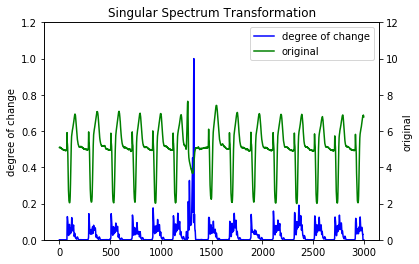

In [4]:
if __name__ == '__main__':
    main()